In [56]:
import sys
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import random
%matplotlib inline
import tensorflow as tf
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn
import datetime as dt
import io

tf.__version__

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
# https://mapr.com/blog/deep-learning-tensorflow/
# https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a
# https://scrolldown.github.io/posts/Python%20tutorial%2005%20-%20데이터%20시각화/


'1.6.0'

In [58]:
df_0403= pd.read_csv('data/0403_09ut8.csv',header=None,
                names=['date','a','stock','time','price','pr_ch','vol_ch','vol'])
print(df_0403.head())


                         date  a   stock   time   price  pr_ch  vol_ch  \
0  2018-04-03 08:51:28.358314  예   DB하이텍  85127   13850   -300    -676   
1  2018-04-03 08:51:28.417354  예   LG이노텍  85127  120500  -3000     200   
2  2018-04-03 08:51:28.426360  예   금호타이어  85128    7780   1790     800   
3  2018-04-03 08:51:28.497410  예      GS  85128   63300   -700       4   
4  2018-04-03 08:51:28.560452  예  아이에스동서  85128   30300   -350    -240   

       vol  
0     1546  
1     1991  
2  3301438  
3      669  
4      331  


In [60]:
sam_0403 = df_0403.query('stock=="삼성전자"')
print(sam_0403)

                               date  a stock    time    price  pr_ch  vol_ch  \
38       2018-04-03 08:51:33.130509  예  삼성전자   85132  2400000 -27000       2   
40       2018-04-03 08:51:33.157528  예  삼성전자   85132  2400000 -27000      41   
249      2018-04-03 08:51:53.684408  예  삼성전자   85153  2400000 -27000     -13   
259      2018-04-03 08:51:54.746122  예  삼성전자   85154  2400000 -27000      10   
328      2018-04-03 08:52:01.311553  예  삼성전자   85200  2400000 -27000      -2   
329      2018-04-03 08:52:01.434595  예  삼성전자   85201  2400000 -27000       3   
379      2018-04-03 08:52:06.058690  예  삼성전자   85205  2400000 -27000      16   
386      2018-04-03 08:52:06.873235  예  삼성전자   85206  2400000 -27000      13   
490      2018-04-03 08:52:18.310887  예  삼성전자   85218  2400000 -27000      25   
593      2018-04-03 08:52:26.621448  예  삼성전자   85226  2400000 -27000       5   
603      2018-04-03 08:52:27.877289  예  삼성전자   85227  2400000 -27000       5   
730      2018-04-03 08:52:39.890324  예  

In [48]:
sort_0403=sam_0403.sort_values(by=['date','price'])
print(sort_0403.head())

                           date  a stock   time    price  pr_ch  vol_ch   vol
38   2018-04-03 08:51:33.130509  예  삼성전자  85132  2400000 -27000       2  2563
40   2018-04-03 08:51:33.157528  예  삼성전자  85132  2400000 -27000      41  2604
249  2018-04-03 08:51:53.684408  예  삼성전자  85153  2400000 -27000     -13  2591
259  2018-04-03 08:51:54.746122  예  삼성전자  85154  2400000 -27000      10  2601
328  2018-04-03 08:52:01.311553  예  삼성전자  85200  2400000 -27000      -2  2599


In [49]:
partcol_0403 =sam_0403[['date','price']]
print(partcol_0403)


                               date    price
38       2018-04-03 08:51:33.130509  2400000
40       2018-04-03 08:51:33.157528  2400000
249      2018-04-03 08:51:53.684408  2400000
259      2018-04-03 08:51:54.746122  2400000
328      2018-04-03 08:52:01.311553  2400000
329      2018-04-03 08:52:01.434595  2400000
379      2018-04-03 08:52:06.058690  2400000
386      2018-04-03 08:52:06.873235  2400000
490      2018-04-03 08:52:18.310887  2400000
593      2018-04-03 08:52:26.621448  2400000
603      2018-04-03 08:52:27.877289  2400000
730      2018-04-03 08:52:39.890324  2400000
731      2018-04-03 08:52:40.059438  2400000
763      2018-04-03 08:52:43.183694  2400000
824      2018-04-03 08:52:49.684043  2400000
832      2018-04-03 08:52:50.308461  2400000
847      2018-04-03 08:52:51.373173  2400000
996      2018-04-03 08:53:06.186181  2400000
1004     2018-04-03 08:53:06.886656  2400000
1021     2018-04-03 08:53:08.685852  2400000
1146     2018-04-03 08:53:18.933371  2400000
1195     2

In [51]:
partcol_0403_09 = partcol_0403.query('date>="2018-04-03 09:00:00" & date<="2018-04-03 15:21:00"')
print(partcol_0403_09)

                               date    price
10152    2018-04-03 09:00:00.058731  2395000
10168    2018-04-03 09:00:00.370940  2395000
10208    2018-04-03 09:00:01.477681  2395000
10345    2018-04-03 09:00:02.451329  2395000
10428    2018-04-03 09:00:03.195829  2395000
10511    2018-04-03 09:00:03.833254  2395000
10582    2018-04-03 09:00:04.447667  2395000
10666    2018-04-03 09:00:05.060075  2395000
10700    2018-04-03 09:00:05.559408  2395000
10760    2018-04-03 09:00:06.126789  2395000
10809    2018-04-03 09:00:06.692167  2395000
10882    2018-04-03 09:00:07.693839  2395000
10915    2018-04-03 09:00:08.194173  2395000
10958    2018-04-03 09:00:08.871627  2395000
11044    2018-04-03 09:00:10.191509  2395000
11103    2018-04-03 09:00:11.005054  2395000
11223    2018-04-03 09:00:12.288912  2395000
11290    2018-04-03 09:00:13.137479  2395000
11325    2018-04-03 09:00:13.527744  2394000
11397    2018-04-03 09:00:14.440351  2394000
11495    2018-04-03 09:00:15.685186  2394000
11609    2

31440
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31440 entries, 10152 to 1679427
Data columns (total 2 columns):
date     31440 non-null object
price    31440 non-null int64
dtypes: int64(1), object(1)
memory usage: 736.9+ KB
None


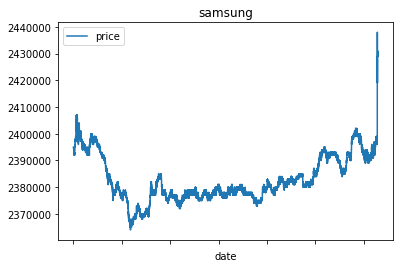

In [63]:
print(len(partcol_0403_09))
print(partcol_0403_09.info())

partcol_0403_09.plot(x='date',y='price',title = 'samsung')


In [ ]:
partcol_0403_09.head()


# s= pd.Series(partcol_0403_09, )
# print(s)
# np.asarray(partcol_0403_09)


# index = pd.DatetimeIndex(partcol_0403_09['date'])
# data = pd.Series(partcol_0403_09['price'], index=index)
# data


ts =pd.Series(partcol_0403_09['price'].values, index=partcol_0403_09['date'])

print(ts)


                               date    price
11588    2018-04-04 09:00:00.591407  2406000
11732    2018-04-04 09:00:02.218498  2407000
11896    2018-04-04 09:00:03.187146  2406000
12035    2018-04-04 09:00:03.950657  2407000
12150    2018-04-04 09:00:04.788216  2407000
12241    2018-04-04 09:00:05.417637  2407000
12392    2018-04-04 09:00:06.216173  2407000
12558    2018-04-04 09:00:07.125779  2407000
12670    2018-04-04 09:00:07.714172  2407000
12894    2018-04-04 09:00:10.141798  2407000
13251    2018-04-04 09:00:13.141804  2408000
13305    2018-04-04 09:00:13.721193  2408000
13360    2018-04-04 09:00:14.288574  2408000
13406    2018-04-04 09:00:14.772898  2408000
13465    2018-04-04 09:00:15.284240  2408000
13722    2018-04-04 09:00:16.918356  2408000
13793    2018-04-04 09:00:17.539749  2408000
13805    2018-04-04 09:00:17.699856  2408000
13807    2018-04-04 09:00:17.710864  2407000
13844    2018-04-04 09:00:17.919000  2408000
13845    2018-04-04 09:00:17.922002  2408000
13851    2

In [29]:

df_0404= pd.read_csv('data/0404_09ut8.csv',header=None,
                names=['date','a','stock','time','price','pr_ch','vol_ch','vol'])
print(df_0404.head())

                               date    price
11588    2018-04-04 09:00:00.591407  2406000
11732    2018-04-04 09:00:02.218498  2407000
11896    2018-04-04 09:00:03.187146  2406000
12035    2018-04-04 09:00:03.950657  2407000
12150    2018-04-04 09:00:04.788216  2407000
12241    2018-04-04 09:00:05.417637  2407000
12392    2018-04-04 09:00:06.216173  2407000
12558    2018-04-04 09:00:07.125779  2407000
12670    2018-04-04 09:00:07.714172  2407000
12894    2018-04-04 09:00:10.141798  2407000
13251    2018-04-04 09:00:13.141804  2408000
13305    2018-04-04 09:00:13.721193  2408000
13360    2018-04-04 09:00:14.288574  2408000
13406    2018-04-04 09:00:14.772898  2408000
13465    2018-04-04 09:00:15.284240  2408000
13722    2018-04-04 09:00:16.918356  2408000
13793    2018-04-04 09:00:17.539749  2408000
13805    2018-04-04 09:00:17.699856  2408000
13807    2018-04-04 09:00:17.710864  2407000
13844    2018-04-04 09:00:17.919000  2408000
13845    2018-04-04 09:00:17.922002  2408000
13851    2

In [34]:
sam_0404 = df_0404.query('stock=="삼성전자"')
sort_0404=sam_0404.sort_values(by=['date','price'])
print(sort_0404.head())


                               date    price
11588    2018-04-04 09:00:00.591407  2406000
11732    2018-04-04 09:00:02.218498  2407000
11896    2018-04-04 09:00:03.187146  2406000
12035    2018-04-04 09:00:03.950657  2407000
12150    2018-04-04 09:00:04.788216  2407000
12241    2018-04-04 09:00:05.417637  2407000
12392    2018-04-04 09:00:06.216173  2407000
12558    2018-04-04 09:00:07.125779  2407000
12670    2018-04-04 09:00:07.714172  2407000
12894    2018-04-04 09:00:10.141798  2407000
13251    2018-04-04 09:00:13.141804  2408000
13305    2018-04-04 09:00:13.721193  2408000
13360    2018-04-04 09:00:14.288574  2408000
13406    2018-04-04 09:00:14.772898  2408000
13465    2018-04-04 09:00:15.284240  2408000
13722    2018-04-04 09:00:16.918356  2408000
13793    2018-04-04 09:00:17.539749  2408000
13805    2018-04-04 09:00:17.699856  2408000
13807    2018-04-04 09:00:17.710864  2407000
13844    2018-04-04 09:00:17.919000  2408000
13845    2018-04-04 09:00:17.922002  2408000
13851    2

In [53]:

partcol_0404 =sam_0404[['date','price']]
print(partcol_0404.head())


                               date    price
11588    2018-04-04 09:00:00.591407  2406000
11732    2018-04-04 09:00:02.218498  2407000
11896    2018-04-04 09:00:03.187146  2406000
12035    2018-04-04 09:00:03.950657  2407000
12150    2018-04-04 09:00:04.788216  2407000
12241    2018-04-04 09:00:05.417637  2407000
12392    2018-04-04 09:00:06.216173  2407000
12558    2018-04-04 09:00:07.125779  2407000
12670    2018-04-04 09:00:07.714172  2407000
12894    2018-04-04 09:00:10.141798  2407000
13251    2018-04-04 09:00:13.141804  2408000
13305    2018-04-04 09:00:13.721193  2408000
13360    2018-04-04 09:00:14.288574  2408000
13406    2018-04-04 09:00:14.772898  2408000
13465    2018-04-04 09:00:15.284240  2408000
13722    2018-04-04 09:00:16.918356  2408000
13793    2018-04-04 09:00:17.539749  2408000
13805    2018-04-04 09:00:17.699856  2408000
13807    2018-04-04 09:00:17.710864  2407000
13844    2018-04-04 09:00:17.919000  2408000
13845    2018-04-04 09:00:17.922002  2408000
13851    2

In [54]:
partcol_0404_09 = partcol_0404.query('date>="2018-04-04 09:00:00" & date<="2018-04-04 15:21:00"')
print(partcol_0404_09)

                               date    price
11588    2018-04-04 09:00:00.591407  2406000
11732    2018-04-04 09:00:02.218498  2407000
11896    2018-04-04 09:00:03.187146  2406000
12035    2018-04-04 09:00:03.950657  2407000
12150    2018-04-04 09:00:04.788216  2407000
12241    2018-04-04 09:00:05.417637  2407000
12392    2018-04-04 09:00:06.216173  2407000
12558    2018-04-04 09:00:07.125779  2407000
12670    2018-04-04 09:00:07.714172  2407000
12894    2018-04-04 09:00:10.141798  2407000
13251    2018-04-04 09:00:13.141804  2408000
13305    2018-04-04 09:00:13.721193  2408000
13360    2018-04-04 09:00:14.288574  2408000
13406    2018-04-04 09:00:14.772898  2408000
13465    2018-04-04 09:00:15.284240  2408000
13722    2018-04-04 09:00:16.918356  2408000
13793    2018-04-04 09:00:17.539749  2408000
13805    2018-04-04 09:00:17.699856  2408000
13807    2018-04-04 09:00:17.710864  2407000
13844    2018-04-04 09:00:17.919000  2408000
13845    2018-04-04 09:00:17.922002  2408000
13851    2

In [ ]:

ts2 =pd.Series(partcol_0404_09['price'].values, index=partcol_0404_09['date'])

                               date    price
11588    2018-04-04 09:00:00.591407  2406000
11732    2018-04-04 09:00:02.218498  2407000
11896    2018-04-04 09:00:03.187146  2406000
12035    2018-04-04 09:00:03.950657  2407000
12150    2018-04-04 09:00:04.788216  2407000
12241    2018-04-04 09:00:05.417637  2407000
12392    2018-04-04 09:00:06.216173  2407000
12558    2018-04-04 09:00:07.125779  2407000
12670    2018-04-04 09:00:07.714172  2407000
12894    2018-04-04 09:00:10.141798  2407000
13251    2018-04-04 09:00:13.141804  2408000
13305    2018-04-04 09:00:13.721193  2408000
13360    2018-04-04 09:00:14.288574  2408000
13406    2018-04-04 09:00:14.772898  2408000
13465    2018-04-04 09:00:15.284240  2408000
13722    2018-04-04 09:00:16.918356  2408000
13793    2018-04-04 09:00:17.539749  2408000
13805    2018-04-04 09:00:17.699856  2408000
13807    2018-04-04 09:00:17.710864  2407000
13844    2018-04-04 09:00:17.919000  2408000
13845    2018-04-04 09:00:17.922002  2408000
13851    2

In [78]:

TS=np.asarray(ts)

num_periods = 90
f_horizon =1   #forcast horizon 1 period 360

x_data = TS[:(len(TS)-(len(TS) % num_periods))]
x_batches = x_data.reshape(-1,90,1)

y_data = TS[1:(len(TS)-(len(TS) % num_periods))+f_horizon]
y_batches = y_data.reshape(-1,90,1)

print(len(x_batches))
print(x_batches.shape)
print(x_batches[0:2])

print(y_batches[0:1])
print(y_batches.shape)

174
(174, 180, 1)
[[[2395000]
  [2395000]
  [2395000]
  [2395000]
  [2395000]
  [2395000]
  [2395000]
  [2395000]
  [2395000]
  [2395000]
  [2395000]
  [2395000]
  [2395000]
  [2395000]
  [2395000]
  [2395000]
  [2395000]
  [2395000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2393000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2393000]
  [2393000]
  [2393000]
  [2393000]
  [2394000]
  [2393000]
  [2394000]
  [2394000]
  [2394000]
  [2393000]
  [2394000]
  [2393000]
  [2394000]
  [2393000]
  [2394000]
  [2393000]
  [2394000]
  [2394000]
  [2394000]
  [2393000]
  [2394000]
  [2393000]
  [2393000]
  [2393000]
  [2393000]
  [2393000]
  [2392000]
  [2393000]
  [2392000

In [66]:
#pull out test data

def test_data(series,forcast,num_periods):
    test_x_setup = TS[-(num_periods+forcast):]
    test_x = test_x_setup[:num_periods].reshape(-1,90,1)
    test_y = TS[-(num_periods):].reshape(-1,90,1)
    return test_x,test_y

x_test, y_test = test_data(TS,f_horizon,num_periods)
print(x_test)
print(x_test.reshape)




[[[2391000]
  [2391000]
  [2392000]
  [2391000]
  [2391000]
  [2392000]
  [2392000]
  [2392000]
  [2391000]
  [2391000]
  [2391000]
  [2391000]
  [2391000]
  [2391000]
  [2391000]
  [2391000]
  [2391000]
  [2391000]
  [2391000]
  [2391000]
  [2391000]
  [2390000]
  [2391000]
  [2391000]
  [2391000]
  [2391000]
  [2392000]
  [2391000]
  [2391000]
  [2391000]
  [2391000]
  [2391000]
  [2391000]
  [2392000]
  [2391000]
  [2391000]
  [2391000]
  [2392000]
  [2391000]
  [2392000]
  [2391000]
  [2392000]
  [2392000]
  [2393000]
  [2393000]
  [2392000]
  [2392000]
  [2392000]
  [2393000]
  [2392000]
  [2393000]
  [2393000]
  [2392000]
  [2392000]
  [2393000]
  [2393000]
  [2392000]
  [2392000]
  [2392000]
  [2392000]
  [2393000]
  [2393000]
  [2393000]
  [2393000]
  [2393000]
  [2393000]
  [2393000]
  [2393000]
  [2393000]
  [2393000]
  [2393000]
  [2393000]
  [2393000]
  [2393000]
  [2394000]
  [2394000]
  [2393000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2394000]
  [2

In [67]:
tf.reset_default_graph()

num_periods = 90
hidden = 200
input = 1
output = 1

x=tf.placeholder(tf.float32,[None, num_periods, input])
y=tf.placeholder(tf.float32,[None, num_periods, output])

#create rnn object
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden, activation=tf.nn.relu)
#Rectified Linear Unit - ReLU
# can be changed to Sigmoid or Hyberbolic Tangent (Tanh)
rnn_output, states=tf.nn.dynamic_rnn(basic_cell,x, dtype=tf.float32)

learning_rate=0.01  #learning rate low

stacked_rnn_output = tf.reshape(rnn_output, [-1,hidden])
stacked_outputs = tf.layers.dense(stacked_rnn_output,output)
outputs = tf.reshape(stacked_outputs, [-1,num_periods,output])

loss = tf.reduce_sum(tf.square(outputs-y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op=optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [62]:
print(dir(tf.contrib.rnn))

['AttentionCellWrapper', 'BasicLSTMCell', 'BasicRNNCell', 'BidirectionalGridLSTMCell', 'CompiledWrapper', 'Conv1DLSTMCell', 'Conv2DLSTMCell', 'Conv3DLSTMCell', 'ConvLSTMCell', 'CoupledInputForgetGateLSTMCell', 'DeviceWrapper', 'DropoutWrapper', 'EmbeddingWrapper', 'FusedRNNCell', 'FusedRNNCellAdaptor', 'GLSTMCell', 'GRUBlockCell', 'GRUBlockCellV2', 'GRUCell', 'GridLSTMCell', 'HighwayWrapper', 'InputProjectionWrapper', 'IntersectionRNNCell', 'LSTMBlockCell', 'LSTMBlockFusedCell', 'LSTMBlockWrapper', 'LSTMCell', 'LSTMStateTuple', 'LayerNormBasicLSTMCell', 'MultiRNNCell', 'NASCell', 'OutputProjectionWrapper', 'PhasedLSTMCell', 'RNNCell', 'ResidualWrapper', 'TimeFreqLSTMCell', 'TimeReversedFusedRNN', 'UGRNNCell', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'stack_bidirectional_dynamic_rnn', 'stack_bidirectional_rnn', 'static_bidirectional_rnn', 'static_rnn', 'static_state_saving_rnn']


In [68]:
epochs = 500         #num of traing cycles

with tf.Session() as sess:
    init.run()
    for ep in range(epochs):
        sess.run(training_op,feed_dict={x: x_batches, y: y_batches})
        if ep % 100 == 0:
            mse = loss.eval(feed_dict={x: x_batches, y: y_batches})
            print(ep, '\tMSE:', mse)
    y_pred=sess.run(outputs,feed_dict={x: x_test})
    print(y_pred)


0 	MSE: 2.2264264e+18


100 	MSE: 1593193300000.0


200 	MSE: 33198870000.0


300 	MSE: 16133098000.0


400 	MSE: 11284913000.0


500 	MSE: 35851160000000.0


600 	MSE: 20149453000.0


700 	MSE: 15656567000.0


800 	MSE: 13013111000.0


900 	MSE: 11532169000.0


[[[2390911. ]
  [2391064. ]
  [2391375.5]
  [2391145.2]
  [2390189.8]
  [2393590. ]
  [2390000.5]
  [2390372.8]
  [2389964.5]
  [2388166.5]
  [2390193. ]
  [2390000.8]
  [2390992.2]
  [2391125.8]
  [2391099.5]
  [2391106.5]
  [2391038.5]
  [2391015.2]
  [2391013.2]
  [2391003.8]
  [2391008.8]
  [2390678. ]
  [2390629.8]
  [2390748.5]
  [2390923.2]
  [2391008.5]
  [2391372. ]
  [2391415.8]
  [2391288.5]
  [2391104.2]
  [2391015.5]
  [2390982. ]
  [2390987.2]
  [2391329.2]
  [2391387.5]
  [2391274. ]
  [2391101. ]
  [2391348. ]
  [2391364.5]
  [2391583.8]
  [2391467. ]
  [2391605.8]
  [2391783.2]
  [2392300.5]
  [2392747.5]
  [2392696. ]
  [2392388.5]
  [2392115.8]
  [2392320.8]
  [2392340. ]
  [2392568.2]
  [2392793. ]
  [2392653. ]
  [2392334.8]
  [2392414. ]
  [2392687.2]
  [2392600.5]
  [2392325.8]
  [2392086.2]
  [2391982.5]
  [2392292.8]
  [2392689.5]
  [2392971. ]
  [2393071.5]
  [2393080. ]
  [2393052.8]
  [2393029. ]
  [2393014.8]
  [2393009.5]
  [2393008.5]
  [2393009.5]
  [239

Text(0.5,0,'time')

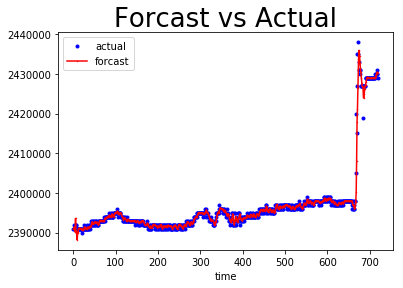

In [79]:
plt.title('Forcast vs Actual', fontsize= 26)
plt.plot(pd.Series(np.ravel(y_test)),'bo',markersize=3,label='actual')
plt.plot(pd.Series(np.ravel(y_pred)),'r',marker='.',markersize=1,label='forcast')
plt.legend(loc='upper left')
plt.xlabel('time')


